In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
from expint import *
from RK import *

# Test convergence order

The following test system is used:

$$ y_j'(t) = (L\mathbf{y}(t))_j + \sin(t)y_j(t)^2 $$

where $L$ is a randomly constructed matrix.

In [2]:
methods = [LawsonEuler, NorsettEuler, ExpMidpoint, ExpTrapezoid, ETDRK4]
m = 5 # dimension
np.random.seed(20180504)
L = np.random.rand(m,m) - 0.5
N = lambda t, y: np.sin(t)*y**2
y0 = np.random.rand(m) - 0.5
t_span = (0.0, 2.0)

In [3]:
dt = 1e-5
yref = solve_semilinear(L, N, t_span, y0, dt, method=RK4)[1][-1,:]

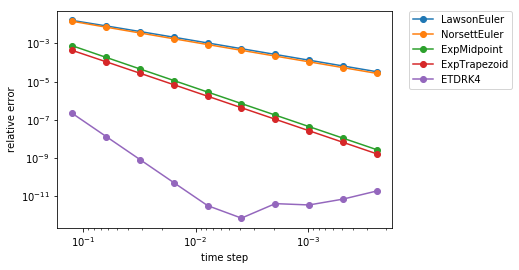

In [4]:
dts = np.logspace(-3, -12, num=10, base=2.0)
for method in methods:
    errs = np.zeros(len(dts))
    for i in range(len(dts)):
        y = solve_semilinear(L, N, t_span, y0, dts[i], method)[1][-1,:]
        errs[i] = la.norm(y - yref) / la.norm(yref)
    plt.plot(dts, errs, '-o', label=method.__name__)
plt.xlabel('time step')
plt.ylabel('relative error')
plt.loglog()
plt.xlim(plt.xlim()[1], plt.xlim()[0]) # revert x axis
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Numerical stability of the phi functions

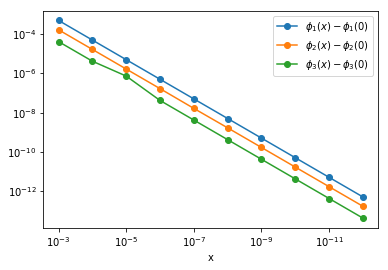

In [5]:
from expint import _phi1, _phi2, _phi3
xs = np.logspace(-3, -12, 10)
res1 = np.abs(_phi1(xs) - 1.0)
res2 = np.abs(_phi2(xs) - 0.5)
res3 = np.abs(_phi3(xs) - 1/6)

plt.plot(xs, res1, '-o', label=r'$\phi_1(x) - \phi_1(0)$')
plt.plot(xs, res2, '-o', label=r'$\phi_2(x) - \phi_2(0)$')
plt.plot(xs, res3, '-o', label=r'$\phi_3(x) - \phi_3(0)$')
plt.legend()
plt.loglog()
plt.xlim(plt.xlim()[1], plt.xlim()[0]) # revert axis
plt.xlabel('x');